1.Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!

Instalando pacotes. 
Para o desafio, os seguintes pacotes em python foram importados:

In [25]:

!pip install pandas -q
!pip install statsmodels -q
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import statsmodels.api as sm

You should consider upgrading via the '/Users/xanaraquelortolan/Library/Mobile Documents/com~apple~CloudDocs/meu_git/meu_git/venv/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 10.1 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 48.4 MB/s eta 0:00:01
     |████████████████████████████████| 31.4 MB 42.0 MB/s eta 0:00:01
You should consider upgrading via the '/Users/xanaraquelortolan/Library/Mobile Documents/com~apple~CloudDocs/meu_git/meu_git/venv/bin/python3 -m pip install --upgrade pip' command.


Obtenção dos Dados

In [8]:
precificacao = pd.read_csv('teste_indicium_precificacao.csv')
df = pd.DataFrame (precificacao)
df

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Análise dos Dados

Esta etapa tem por objetivo ter um entendimento de como os dados estão estruturados.

In [16]:
##1. Visão Geral do Dataset
#Tipos de dados, valores ausentes e estatísticas descritivas do conjunto de dados.

print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df['price'].mean())

(48894, 16)
id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object
id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_t

In [17]:
df[['price', 'minimo_noites', 'price', 'numero_de_reviews', 'disponibilidade_365']].describe()

,price,minimo_noites,price,numero_de_reviews,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,152.720763,7.030085,152.720763,23.274758,112.776169
std,240.156625,20.510741,240.156625,44.550991,131.618692
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,69.000000,1.000000,0.000000
50%,106.000000,3.000000,106.000000,5.000000,45.000000
75%,175.000000,5.000000,175.000000,24.000000,227.000000
max,10000.000000,1250.000000,10000.000000,629.000000,365.000000


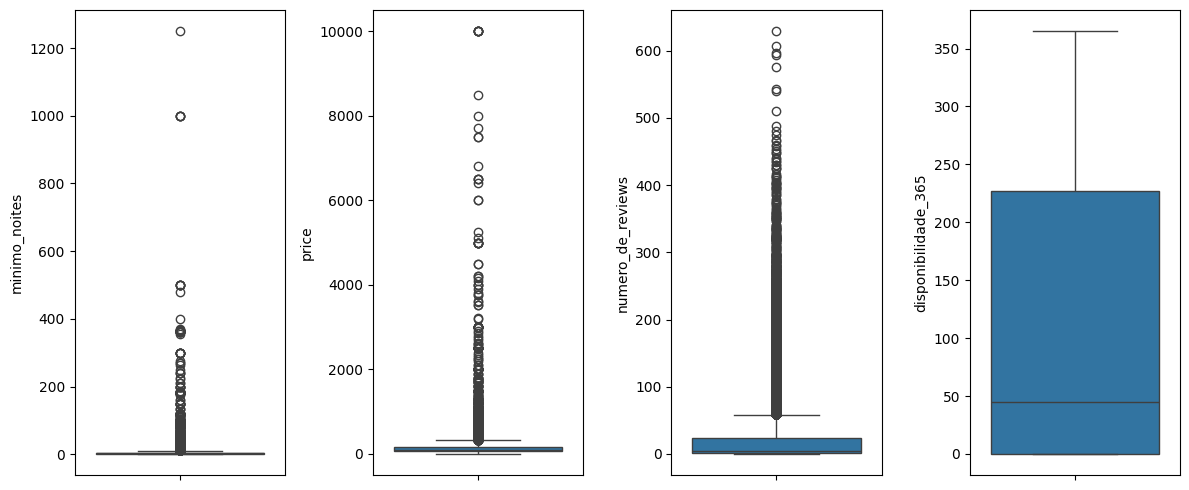

In [21]:
fig, axes = plt.subplots(1,4, figsize=(12, 5))
sns.boxplot(y=df['minimo_noites'], ax=axes[0])
sns.boxplot(y=df['price'], ax=axes[1])
sns.boxplot(y=df['numero_de_reviews'], ax=axes[2])
sns.boxplot(y=df['disponibilidade_365'], ax=axes[3])
plt.tight_layout()

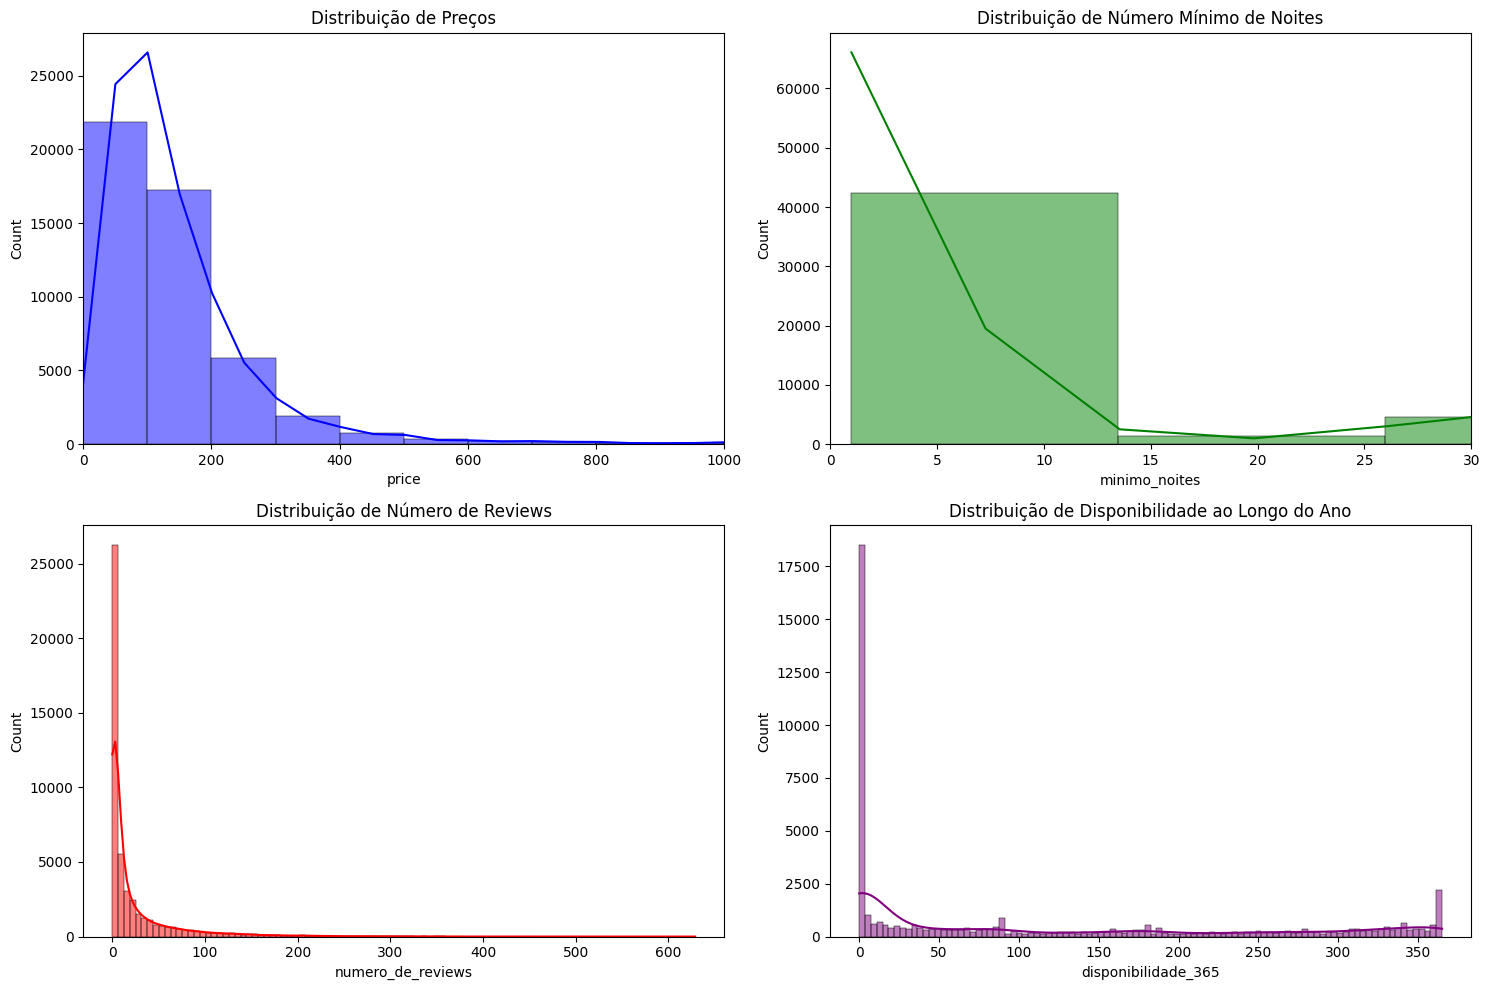

In [18]:
##1. Visão Geral do Dataset
#Distribuição de variáveis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.histplot(df['price'], bins=100, ax=axes[0, 0], kde=True, color='blue')
axes[0, 0].set_title('Distribuição de Preços')
axes[0, 0].set_xlim(0, 1000) 

sns.histplot(df['minimo_noites'], bins=100, ax=axes[0, 1], kde=True, color='green')
axes[0, 1].set_title('Distribuição de Número Mínimo de Noites')
axes[0, 1].set_xlim(0, 30) 

sns.histplot(df['numero_de_reviews'], bins=100, ax=axes[1, 0], kde=True, color='red')
axes[1, 0].set_title('Distribuição de Número de Reviews')

sns.histplot(df['disponibilidade_365'], bins=100, ax=axes[1, 1], kde=True, color='purple')
axes[1, 1].set_title('Distribuição de Disponibilidade ao Longo do Ano')

plt.tight_layout()
plt.show()

Considerações:

Visão Geral do Dataset

O dataset possui 48894 linhas e 16 colunas. 

O dataset possui uma combinação de tipos de dados: int, float e object (strings). 
As colunas nome e host_name têm alguns valores ausentes, mas são poucos. A coluna ultima_review e reviews_por_mes têm um número significativo de valores ausentes, o que pode ser devido a propriedades sem reviews.

O preço varia significativamente, com uma faixa de  0 a 10.000 (média = $152.72) sugerindo a presença de outliers com preços muito altos. A distribuição de preços é fortemente inclinada à direita, com a maioria dos aluguéis custando menos de $200 por noite. 

O número mínimo de noites também varia bastante, de 1 a 1.250 noites. A maioria dos aluguéis exige um número mínimo de noites bastante baixo, geralmente menos de 5 noites. Existem alguns outliers com requisitos de estadia muito longos. 


O número de reviews e a disponibilidade ao longo do ano apresentam grande variação, o que pode indicar diferenças significativas na popularidade e ocupação das propriedades.
Muitas propriedades têm poucas ou nenhuma review, enquanto algumas têm muitas, indicando variações na popularidade ou na frequência de aluguel. A disponibilidade varia amplamente, com muitas propriedades disponíveis por menos de 100 dias ao ano e outras disponíveis o ano todo.


Histogramas sem outliers

Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

In [34]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimo_noites > 30].index, axis=0, inplace=True)


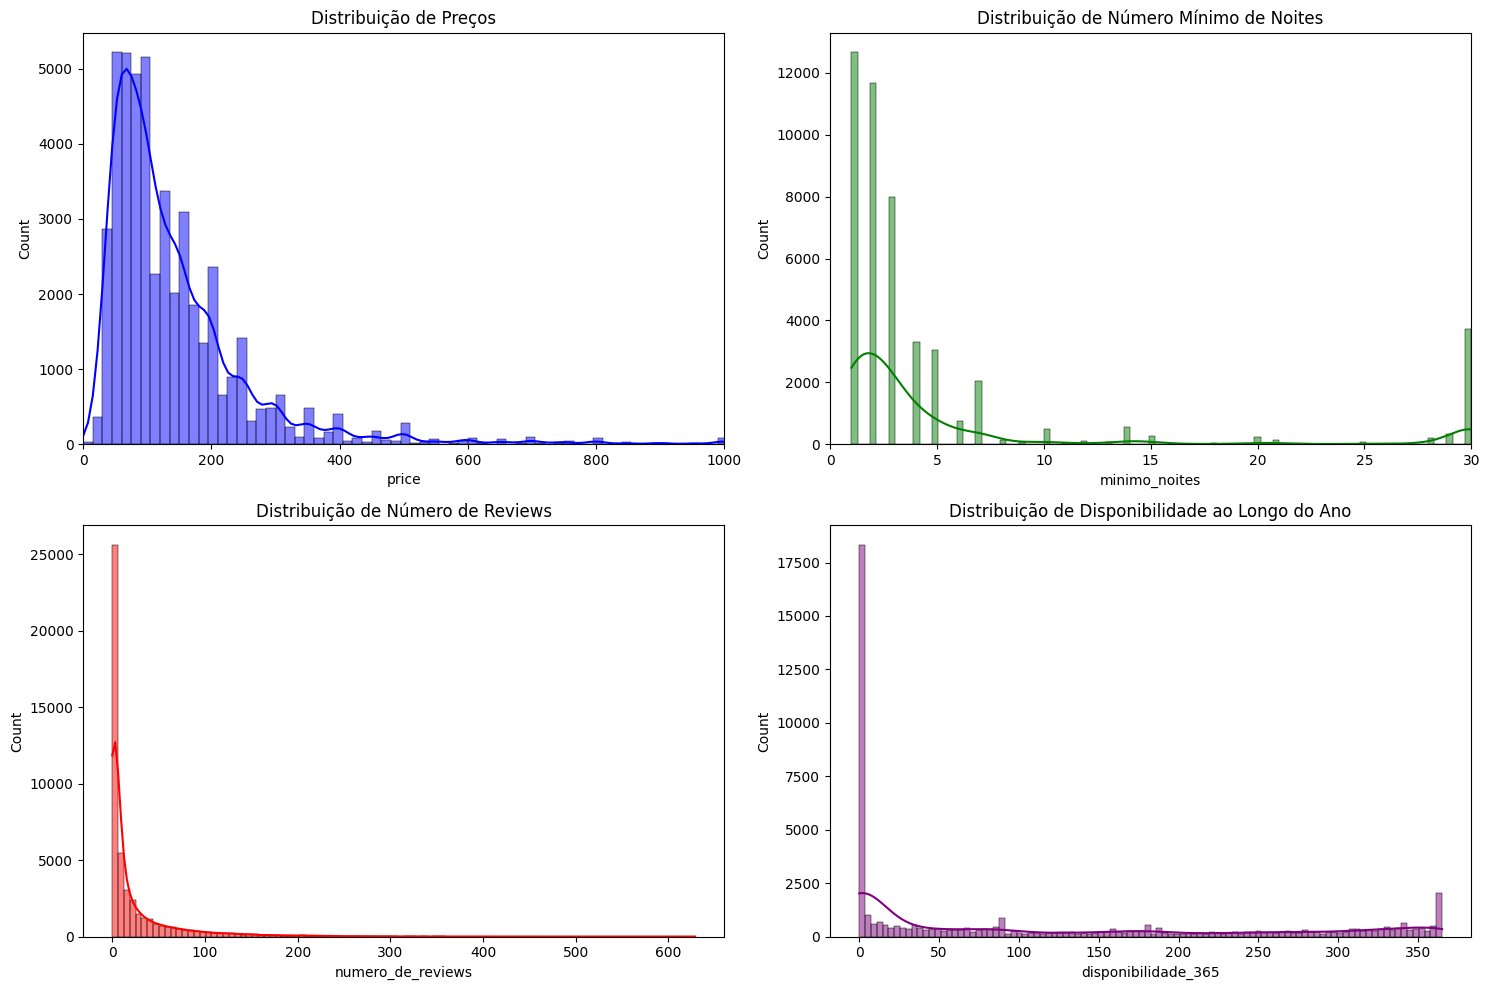

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.histplot(df_clean['price'], bins=100, ax=axes[0, 0], kde=True, color='blue')
axes[0, 0].set_title('Distribuição de Preços')
axes[0, 0].set_xlim(0, 1000) 

sns.histplot(df_clean['minimo_noites'], bins=100, ax=axes[0, 1], kde=True, color='green')
axes[0, 1].set_title('Distribuição de Número Mínimo de Noites')
axes[0, 1].set_xlim(0, 30) 

sns.histplot(df_clean['numero_de_reviews'], bins=100, ax=axes[1, 0], kde=True, color='red')
axes[1, 0].set_title('Distribuição de Número de Reviews')

sns.histplot(df_clean['disponibilidade_365'], bins=100, ax=axes[1, 1], kde=True, color='purple')
axes[1, 1].set_title('Distribuição de Disponibilidade ao Longo do Ano')

plt.tight_layout()
plt.show()

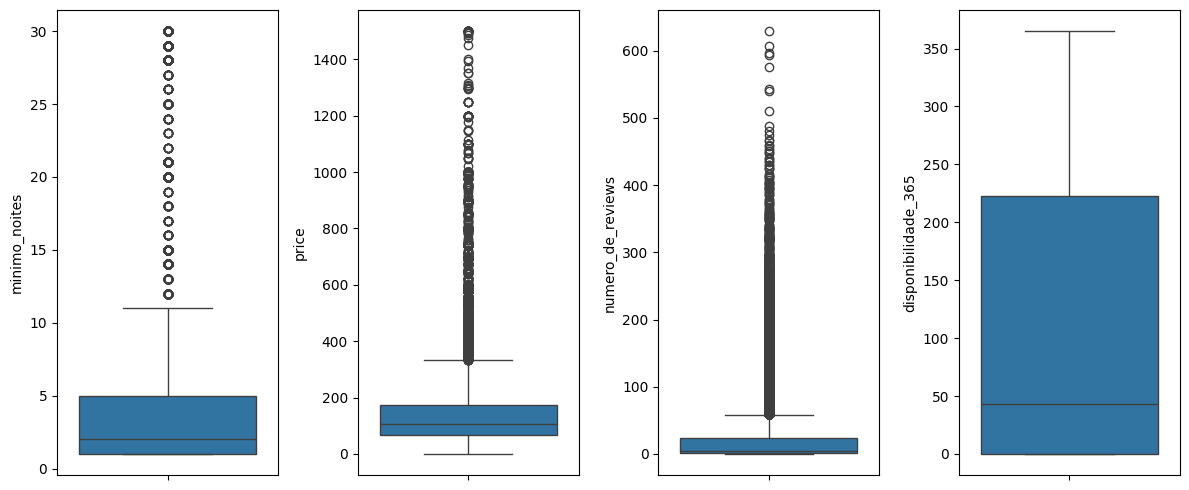

In [31]:
fig, axes = plt.subplots(1,4, figsize=(12, 5))
sns.boxplot(y=df_clean['minimo_noites'], ax=axes[0])
sns.boxplot(y=df_clean['price'], ax=axes[1])
sns.boxplot(y=df_clean['numero_de_reviews'], ax=axes[2])
sns.boxplot(y=df_clean['disponibilidade_365'], ax=axes[3])
plt.tight_layout()

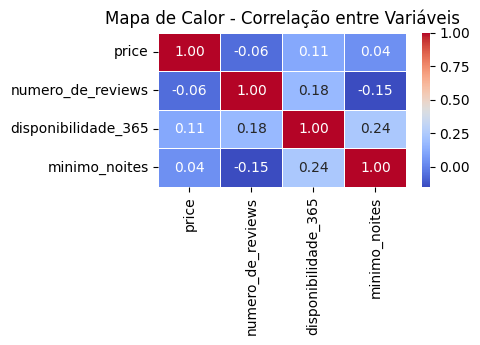

In [32]:
##2. Relações entre Variáveis
#Análise das correlações entre algumas das principais variáveis numéricas

correlacao = df_clean[['price', 'numero_de_reviews', 'disponibilidade_365', 'minimo_noites']].corr()
plt.figure(figsize=(4, 2))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor - Correlação entre Variáveis')
plt.show()

Relações entre Variáveis

Preço e Número Mínimo de Noites: Existe uma correlação muito baixa entre o preço e o número mínimo de noites, sugerindo que o preço não aumenta significativamente com o aumento do número mínimo de noites exigido. 

Preço e Número de Reviews: A correlação entre preço e número de reviews é negativa e fraca. Isso pode indicar que imóveis mais caros podem ser menos acessíveis para a maioria dos inquilinos, resultando em menos aluguéis e, por consequência, menos reviews, ou usuários da plataforma podem preferir alugar imóveis mais baratos, o que leva a um maior número de reviews nesses imóveis devido à maior rotatividade, ou ainda menor necessidade de reviews em imóveis de alto valor pois esse público não é influenciado por reviews. 

Preço e Disponibilidade ao Longo do Ano: A correlação é praticamente nula, indicando que o preço não é um fator determinante na disponibilidade anual da propriedade. 

Número de Reviews e Disponibilidade ao Longo do Ano: Esta correlação positiva, embora ainda fraca, indica que imóveis com mais reviews tendem a ter uma ligeiramente maior disponibilidade ao longo do ano. Isso pode indicar que uma maior quantidade de reviews pode aumentar a visibilidade e a atratividade do imóvel, levando a uma maior demanda e, por consequência, a uma maior disponibilidade para ser alugado ou imóveis que oferecem uma boa experiência podem receber mais reviews e, ao mesmo tempo, serem oferecidos com mais frequência ao longo do ano.

2. Responda também às seguintes perguntas:
Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra? O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço? Existe algum padrão no texto do nome do local para lugares de mais alto valor?

In [22]:
#Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

#Análise geográfica
 
loc_price = df.groupby(['bairro_group'])['price'].mean().reset_index()
loc_price = loc_price.sort_values(by='price', ascending=False)

loc_reviews = df.groupby(['bairro_group'])['numero_de_reviews'].sum().reset_index()
loc_reviews = loc_reviews.sort_values(by='numero_de_reviews', ascending=False)

resultado_unificado = loc_price.merge(loc_reviews, on='bairro_group')
resultado_unificado.columns = ['bairro_group', 'preco_medio', 'soma_reviews']
resultado_unificado

,bairro_group,preco_medio,soma_reviews
0,Manhattan,196.875814,454569
1,Brooklyn,124.381983,486565
2,Staten Island,114.812332,11541
3,Queens,99.517649,156950
4,Bronx,87.496792,28371


In [23]:
#Gráfico geodata
preco_bairro = df.groupby('bairro').agg({'price':'mean', 'numero_de_reviews':'mean'}).reset_index()
media_localizacao = df.groupby('bairro').agg({'latitude':'mean', 'longitude':'mean'}).reset_index()
geo_data = pd.merge(preco_bairro, media_localizacao, on='bairro')
ny_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
for _, row in geo_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=f"Bairro: {row['bairro']}\nPreço Médio: ${row['price']:.2f}\nMédia de Reviews: {row['numero_de_reviews']:.2f}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(ny_map)
ny_map

Melhor localização para Investir em um Apartamento para Alugar

Considerações:

A escolha da localização para investir em um apartamento para alugar na plataforma depende de vários fatores, como preço médio de aluguel, popularidade da área (medida pelo número de aluguéis e reviews), e potencial de valorização. Considerando que não temos dados sobre valorizaçao e taxa de ocupação, podemos inferir que: Locais com média de preços de aluguel mais altos e maior número de reviews, podem indicar áreas de maior demanda e prestígio, como Manhattan e em seguida, Brooklyn. Investir aqui pode oferecer retornos mais altos por aluguel.

In [27]:
#O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço? 
X = sm.add_constant(df[['minimo_noites', 'disponibilidade_365']])
y = df['price']
model = sm.OLS(y, X).fit()
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     189.1
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           1.51e-82
Time:                        20:15:08   Log-Likelihood:            -3.3719e+05
No. Observations:               48894   AIC:                         6.744e+05
Df Residuals:                   48891   BIC:                         6.744e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 134.2164      1.445     92.897      0.000     131.385     137.048
minimo_noites           0.3706      0.053      6.951      0.000       0.266       0.475
disponibilidade_365     0.1410      0.008     16.971      0.000       0.125       0.157
==============================================================================
Omnibus:                   105222.775   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        712158923.327
Skew:                          19.175   Prob(JB):                         0.00
Kurtosis:                     592.998   Cond. No.                         232.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interferência do número mínimo de noites e a disponibilidade ao longo do ano 

Considerações:

Embora o modelo seja estatisticamente significativo, o baixo valor de R² sugere que há outros fatores que afetam o preço que não estão sendo capturados por este modelo. Isso indica a necessidade de incluir outras variáveis relevantes ou considerar modelos mais complexos para melhorar a explicação da variabilidade nos preços dos imóveis. ​

In [26]:
#Existe algum padrão no texto do nome do local para lugares de mais alto valor?

from collections import Counter
import re

def extrair_palavras(texto):
    palavras = re.sub("[^a-zA-Z]", " ", texto).lower().split()
    return palavras

preco_baixo = df[df['price'] <= 100]
preco_medio = df[(df['price'] > 100) & (df['price'] <= 200)]
preco_alto = df[df['price'] > 200]

palavras_baixo = Counter()
preco_baixo['nome'].dropna().apply(lambda x: palavras_baixo.update(extrair_palavras(x)))

palavras_medio = Counter()
preco_medio['nome'].dropna().apply(lambda x: palavras_medio.update(extrair_palavras(x)))

palavras_alto = Counter()
preco_alto['nome'].dropna().apply(lambda x: palavras_alto.update(extrair_palavras(x)))

top_palavras_baixo = palavras_baixo.most_common(10)
top_palavras_medio = palavras_medio.most_common(10)
top_palavras_alto = palavras_alto.most_common(10)

top_palavras_baixo, top_palavras_medio, top_palavras_alto

([('in', 9320),
  ('room', 8919),
  ('private', 5375),
  ('bedroom', 4236),
  ('cozy', 3308),
  ('apartment', 2626),
  ('brooklyn', 2389),
  ('to', 2323),
  ('manhattan', 1888),
  ('spacious', 1814)],
 [('in', 5296),
  ('apartment', 3024),
  ('bedroom', 2737),
  ('studio', 2286),
  ('apt', 2142),
  ('br', 1696),
  ('private', 1588),
  ('east', 1512),
  ('the', 1511),
  ('cozy', 1472)],
 [('in', 2182),
  ('br', 1448),
  ('bedroom', 1336),
  ('apartment', 1112),
  ('apt', 935),
  ('luxury', 738),
  ('village', 728),
  ('the', 727),
  ('loft', 662),
  ('w', 662)])

Padrões no Texto do Nome do Local para Lugares de Mais Alto Valor

Considerações:

Nomes de aluguéis em faixas de preço mais elevadas frequentemente incluem palavras como "luxury", "village" e "loft", sugerindo que esses termos podem estar associados a propriedades mais caras ou desejáveis.
Diferenças nos Termos Usados: Enquanto propriedades mais baratas tendem a usar palavras como "cozy", "private", e "bedroom", propriedades mais caras usam termos que indicam luxo ou localizações exclusivas.

3. Explique como você faria a previsão do preço a partir dos dados.
Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

4. Supondo um apartamento com as seguintes características:
{'id': 2595, 'nome': 'Skylit Midtown Castle', 'host_id': 2845, 'host_name': 'Jennifer', 'bairro_group': 'Manhattan', 'bairro': 'Midtown', 'latitude': 40.75362, 'longitude': -73.98377, 'room_type': 'Entire home/apt', 'price': 225, 'minimo_noites': 1, 'numero_de_reviews': 45, 'ultima_review': '2019-05-21', 'reviews_por_mes': 0.38, 'calculado_host_listings_count': 2, 'disponibilidade_365': 355}
Qual seria a sua sugestão de preço?

CONCLUSÕES:

Hipóteses de Negócio:

Investimento em Luxo: Propriedades que podem ser descritas com palavras como "luxury", "village" ou "loft" podem justificar preços de aluguel mais altos e podem ser investimentos atraentes. 
Foco em Bairros Populares: Bairros mencionados frequentemente, como "Brooklyn" e "Manhattan", podem ser locais de alta demanda, sugerindo um bom potencial de investimento. 
Marketing de Propriedades: Usar termos populares como "apartment" na descrição dos aluguéis pode aumentar seu apelo, independentemente da faixa de preço. 
Diversificação de Portfólio: Investir em uma mistura de propriedades de luxo e opções mais acessíveis pode ser uma estratégia para alcançar diferentes segmentos de mercado.